# Contents
- [Theory](#Theory)
- [KMeans Clustering](#KMeans-Clustering)
- [Hierarchical Clustering](#Hierarchical-Clustering)
- [DBSCAN](#DBSCAN)
- [Gaussian Mixture Model](#Gaussian-Mixture-Model)
- [Mean Shift](#Mean-Shift)
- [Spectral Clustering](#Spectral-Clustering)
- [OPTICS](#OPTICS)
- [BIRCH](#BIRCH)
- [HDBSCAN](#HDBSCAN)
- [Other Methods](#Other-Methods)
- [All Methods](#All-Methods)
___

# Theory

[SK Learn Documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


<img src="sklearn_clustering.png" alt="sklearn clustering image" width="900">


# KMeans Clustering

`Setup`


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

`Prepare Data`


In [21]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

X

y_true


array([[ -9.1139443 ,   6.81361629],
       [ -9.35457578,   7.09278959],
       [ -2.01567068,   8.28177994],
       [ -7.01023591,  -6.22084348],
       [-10.06120248,   6.71867113],
       [ -6.36503142,  -6.97607271],
       [  4.74378739,   2.20436011],
       [ -6.63186832,  -7.21834432],
       [ -2.79670217,   8.90289074],
       [  3.92509674,   2.36710185],
       [ -2.87022159,  10.12565304],
       [  4.85408813,   1.55742393],
       [ -2.38387947,   7.83848405],
       [ -3.35842007,   8.76189893],
       [ -9.2287133 ,   7.03124769],
       [ -2.93042948,   8.81768884],
       [ -9.81485322,   7.35237388],
       [  3.42479328,   2.08504227],
       [ -2.45095109,   9.59547312],
       [ -2.15708337,  10.3285595 ],
       [  5.33503618,   1.48076029],
       [ -2.60596905,   9.25671664],
       [ -6.29455535,  -6.96834402],
       [ -8.90572459,   7.19094116],
       [ -2.78724824,   8.73484828],
       [ -8.52044525,   8.18846409],
       [ -9.18439055,   7.77675765],
 

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

In [22]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.09518511e+00,  6.40437493e-01],
       [-1.14131498e+00,  6.85549291e-01],
       [ 2.65577968e-01,  8.77679031e-01],
       [-6.91897096e-01, -1.46580952e+00],
       [-1.27677771e+00,  6.25095241e-01],
       [-5.68209210e-01, -1.58784751e+00],
       [ 1.56138896e+00, -1.04375273e-01],
       [-6.19362747e-01, -1.62699634e+00],
       [ 1.15851588e-01,  9.78044739e-01],
       [ 1.40444319e+00, -7.80777280e-02],
       [ 1.01757665e-01,  1.17563171e+00],
       [ 1.58253399e+00, -2.08914121e-01],
       [ 1.94991097e-01,  8.06046555e-01],
       [ 8.16836403e-03,  9.55261779e-01],
       [-1.11718672e+00,  6.75604694e-01],
       [ 9.02156088e-02,  9.64276907e-01],
       [-1.22955173e+00,  7.27495690e-01],
       [ 1.30853333e+00, -1.23655922e-01],
       [ 1.82133239e-01,  1.08995959e+00],
       [ 2.38468677e-01,  1.20841950e+00],
       [ 1.67473336e+00, -2.21302249e-01],
       [ 1.52415771e-01,  1.03521970e+00],
       [-5.54698709e-01, -1.58659862e+00],
       [-1.

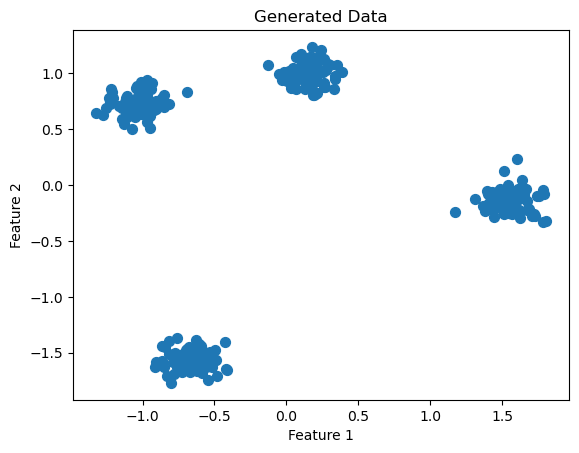

In [34]:
# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50);
plt.title("Generated Data");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Implementation`


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


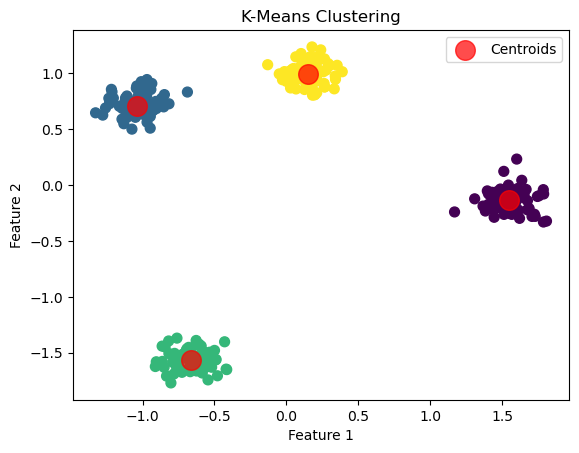

In [33]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids');
plt.title("K-Means Clustering");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.legend();
plt.show();


`Parameters`


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

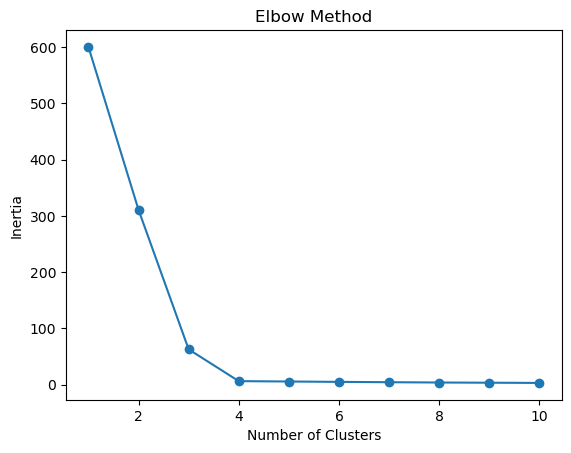

In [31]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42);
    kmeans.fit(X_scaled);
    inertia.append(kmeans.inertia_);

plt.plot(range(1, 11), inertia, marker='o');
plt.title("Elbow Method");
plt.xlabel("Number of Clusters");
plt.ylabel("Inertia");
plt.show();

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

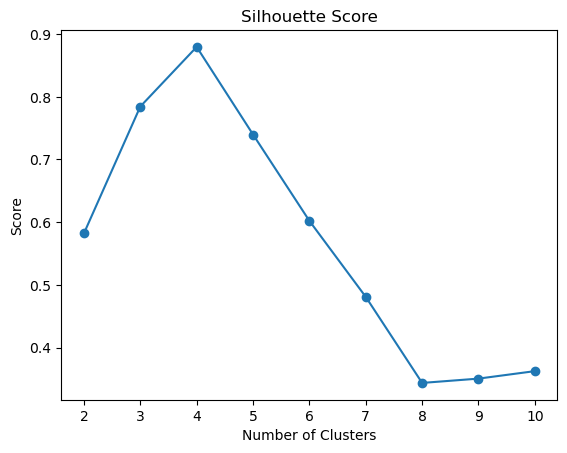

In [32]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42);
    labels = kmeans.fit_predict(X_scaled);
    score = silhouette_score(X_scaled, labels);
    silhouette_scores.append(score);

plt.plot(range(2, 11), silhouette_scores, marker='o');
plt.title("Silhouette Score");
plt.xlabel("Number of Clusters");
plt.ylabel("Score");
plt.show();

`Exploring Cluster Characteristics`


In [28]:
# Assign clusters to data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels
df.head()

# Display cluster centers
centers_df = pd.DataFrame(centers, columns=['Feature 1', 'Feature 2'])
print("Cluster Centers:\n", centers_df)


,Feature 1,Feature 2,Cluster
0,-1.095185,0.640437,3
1,-1.141315,0.685549,3
2,0.265578,0.877679,8
3,-0.691897,-1.465810,5
4,-1.276778,0.625095,3


Cluster Centers:
    Feature 1  Feature 2
0   1.550479  -0.135080
1  -1.041626   0.710033
2  -0.661421  -1.567527
3   0.152569   0.992573


`Custom Implementation`

In [ ]:
def initialize_centroids(X, k):
    """Randomly initialize centroids."""
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    return X[random_indices[:k]]

def assign_clusters(X, centroids):
    """Assign data points to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Recalculate centroids."""
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans_custom(X, k, max_iters=100, tol=1e-4):
    """Custom implementation of K-Means."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels

# Test custom implementation
centroids, labels = kmeans_custom(X_scaled, 4)


[Back to the top](#Contents)
___

# Hierarchical Clustering
- Agglomerative


`Setup`    


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


`Prepare Data`   


Text(0.5, 1.0, 'Generated Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

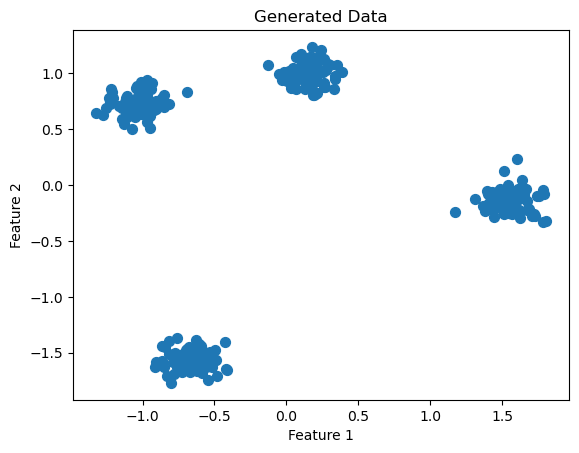

In [36]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


`Implementation`   


<Figure size 1000x700 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [102.5, 102.5, 130.0, 130.0],
  [70.0, 70.0, 116.25, 116.25],
  [26.25, 26.25, 93.125, 93.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [192.5, 192.5, 237.5, 237.5],
  [160.0, 160.0, 215.0, 215.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [187.5, 187.5, 291.25, 291.25],
  [59.6875, 59.6875, 239.375, 239.375],
  [345.0, 345.0, 3

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

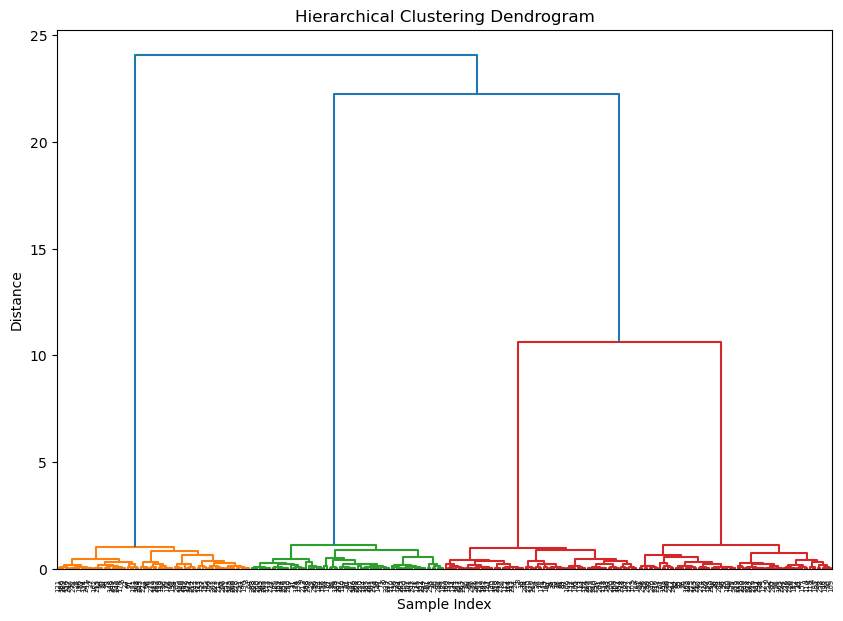

Text(0.5, 1.0, 'Hierarchical Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

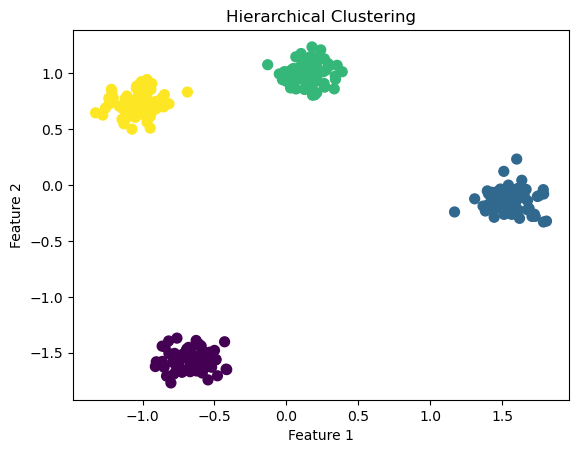

In [37]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels based on a distance threshold
threshold = 6  # Set an appropriate threshold for cutting the dendrogram
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Visualize the resulting clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


`Parameters`    


<Figure size 1000x700 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [102.5, 102.5, 130.0, 130.0],
  [70.0, 70.0, 116.25, 116.25],
  [26.25, 26.25, 93.125, 93.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [192.5, 192.5, 237.5, 237.5],
  [160.0, 160.0, 215.0, 215.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [187.5, 187.5, 291.25, 291.25],
  [59.6875, 59.6875, 239.375, 239.375],
  [345.0, 345.0, 3

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Ward Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

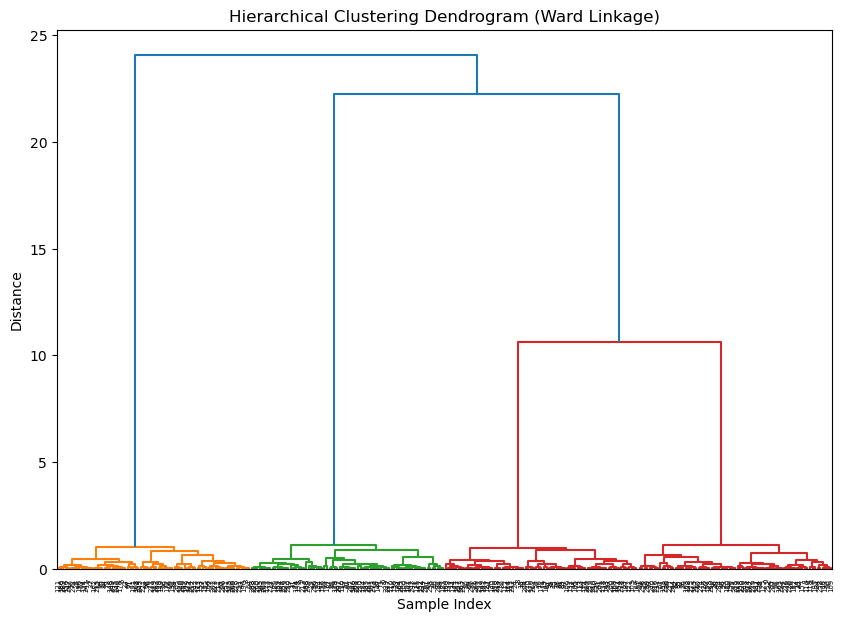

<Figure size 1000x700 with 0 Axes>

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [13.75, 13.75, 53.75, 53.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [202.5, 202.5, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [221.25, 221.25, 281.875, 281.875],
  [163.75, 163.75, 251.5625, 251.5625],
  [108.125, 108.125, 207.65625, 207.65625],
  [33.75, 33.75, 157.890625, 157

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Complete Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

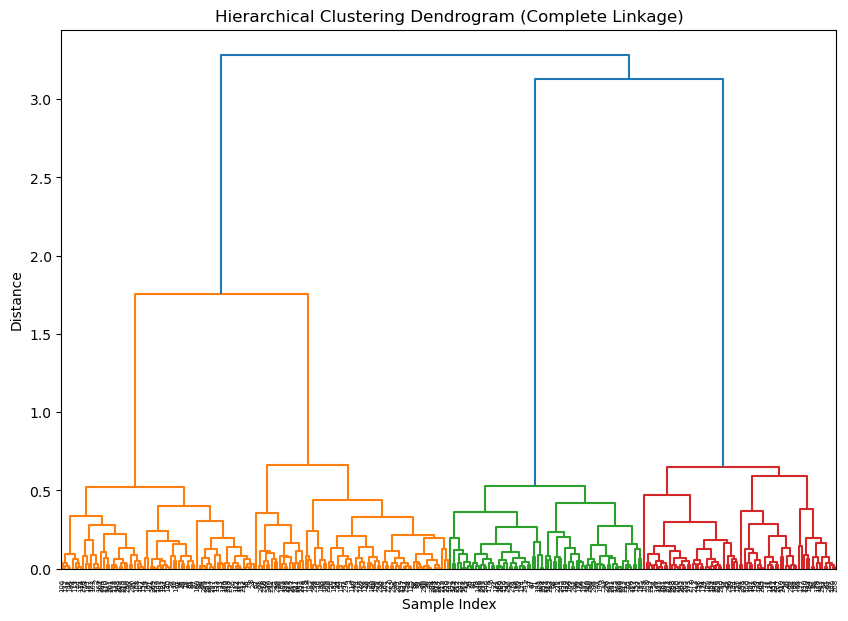

<Figure size 1000x700 with 0 Axes>

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [132.5, 132.5, 163.75, 163.75],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [148.125, 148.125, 211.875, 211.875],
  [93.75, 93.75, 180.0, 180.0],
  [62.5, 62.5, 136.875, 136.875],
  [23.75, 23.75, 99.6875, 99.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [3

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Average Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

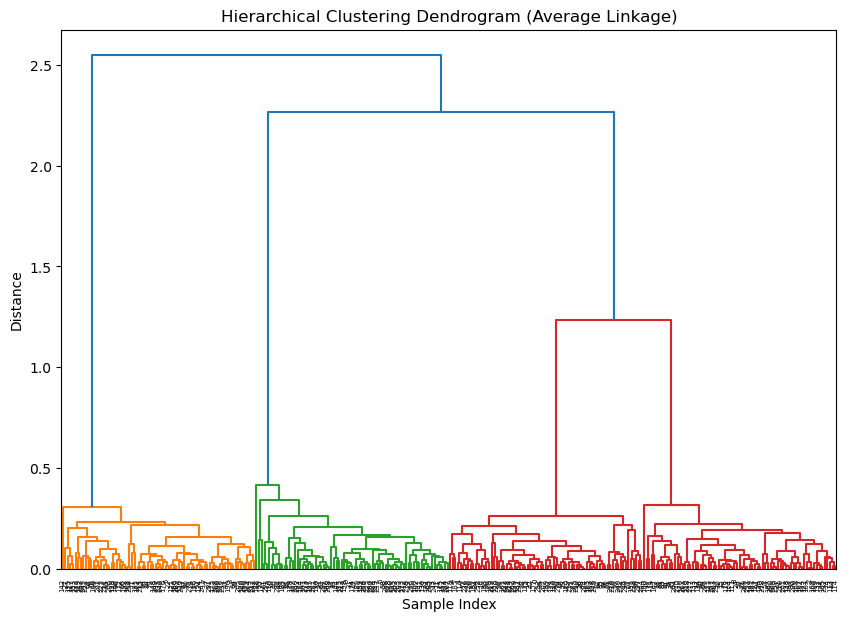

<Figure size 1000x700 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [265.0, 265.0, 291.25, 291.25],
  [233.75, 233.75, 278.125, 278.125],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [395.0, 395.0, 405.0, 405.0],
  [372.5, 372.5, 400.0, 400.0],
  [340.0, 340.0, 386.25, 386.25],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [465.0, 465.0, 475.0, 475.0],
  [4

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Single Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

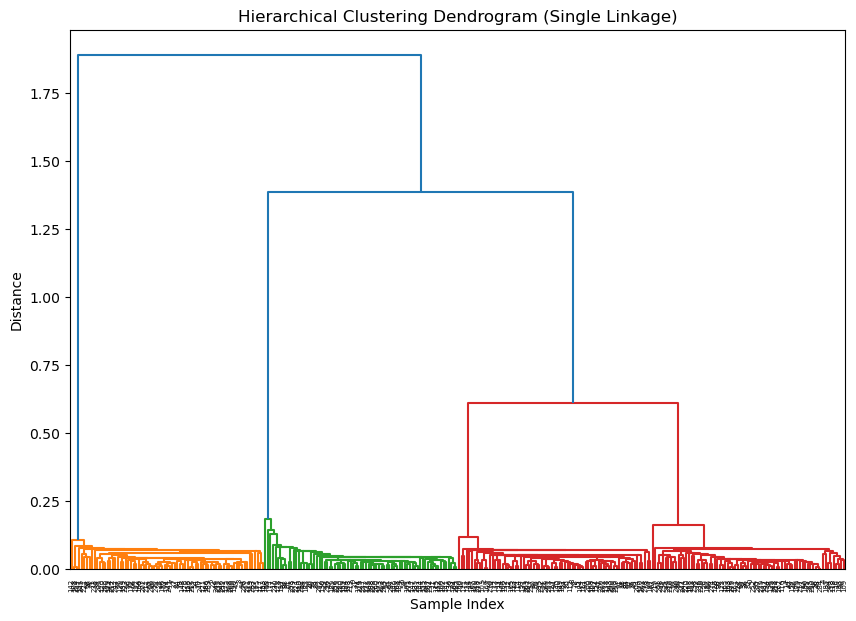

In [38]:
# Experiment with different linkage methods
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    linkage_matrix = linkage(X_scaled, method=method)
    
    # Visualize dendrogram for each method
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(f"Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()


`Exploring Cluster Characteristics`    


In [39]:
# Assign clusters to the original data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = clusters

# Print the number of points in each cluster
print(df['Cluster'].value_counts())

# Display the cluster centers (approximated as the mean of points in each cluster)
cluster_centers = df.groupby('Cluster').mean()
print("Cluster Centers (Approximated):\n", cluster_centers)


Cluster
4    75
3    75
1    75
2    75
Name: count, dtype: int64
Cluster Centers (Approximated):
          Feature 1  Feature 2
Cluster                      
1        -0.661421  -1.567527
2         1.550479  -0.135080
3         0.152569   0.992573
4        -1.041626   0.710033


`Custom Implementation`    


<Figure size 1000x700 with 0 Axes>

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [132.5, 132.5, 163.75, 163.75],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [148.125, 148.125, 211.875, 211.875],
  [93.75, 93.75, 180.0, 180.0],
  [62.5, 62.5, 136.875, 136.875],
  [23.75, 23.75, 99.6875, 99.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [3

Text(0.5, 1.0, 'Custom Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

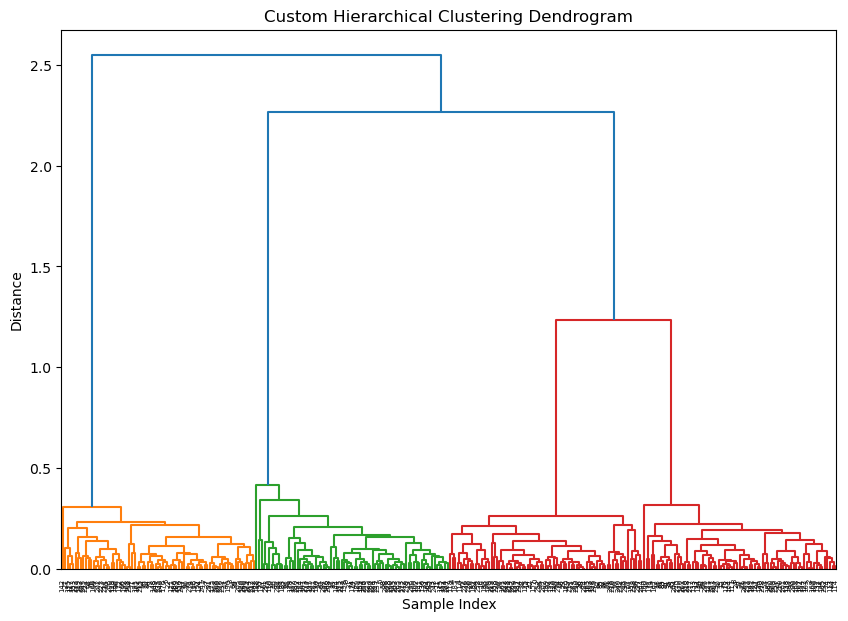

In [42]:
def custom_linkage(X, method='ward'):
    """Custom implementation of hierarchical clustering."""
    n_samples = X.shape[0]
    distances = squareform(pdist(X))  # Pairwise distances
    clusters = {i: [i] for i in range(n_samples)}  # Initialize each point as its own cluster
    linkage_matrix = []
    current_cluster_idx = n_samples  # Start indices for new clusters
    
    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist = np.inf
        to_merge = (None, None)
        cluster_keys = list(clusters.keys())
        
        for i, c1 in enumerate(cluster_keys):
            for c2 in cluster_keys[i + 1:]:
                # Calculate distance between clusters
                dist = np.mean([
                    distances[p1, p2]
                    for p1 in clusters[c1]
                    for p2 in clusters[c2]
                ])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (c1, c2)
        
        # Merge the two closest clusters
        c1, c2 = to_merge
        new_cluster = clusters[c1] + clusters[c2]
        linkage_matrix.append([c1, c2, min_dist, len(new_cluster)])
        
        # Update clusters
        del clusters[c1]
        del clusters[c2]
        clusters[current_cluster_idx] = new_cluster
        current_cluster_idx += 1
    
    return np.array(linkage_matrix)

# Use the corrected custom linkage function
linkage_matrix_custom = custom_linkage(X_scaled)

# Visualize dendrogram using the corrected custom linkage matrix
plt.figure(figsize=(10, 7));
dendrogram(linkage_matrix_custom);
plt.title("Custom Hierarchical Clustering Dendrogram");
plt.xlabel("Sample Index");
plt.ylabel("Distance");
plt.show();


[Back to the top](#Contents)
___

# DBSCAN

`Setup`    


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


`Prepare Data`   


Text(0.5, 1.0, 'Generated Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

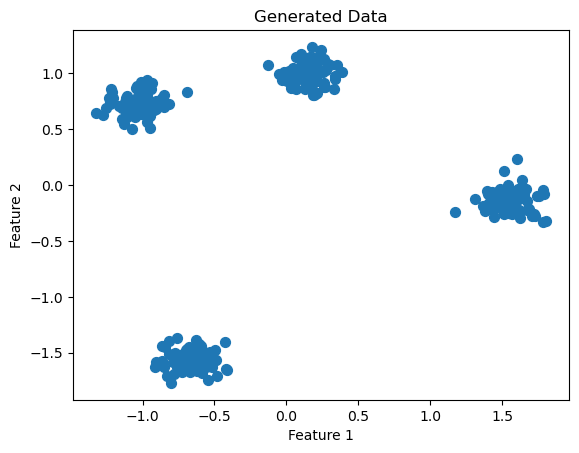

In [44]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


`Implementation`   


Text(0.5, 1.0, 'DBSCAN Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

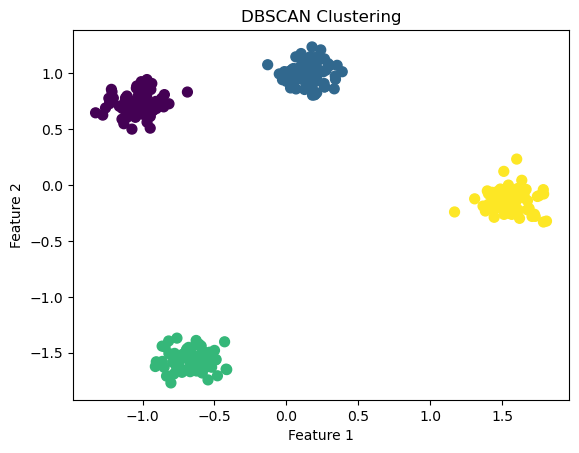

In [45]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters: eps (neighborhood radius), min_samples
labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


`Parameters`    


Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

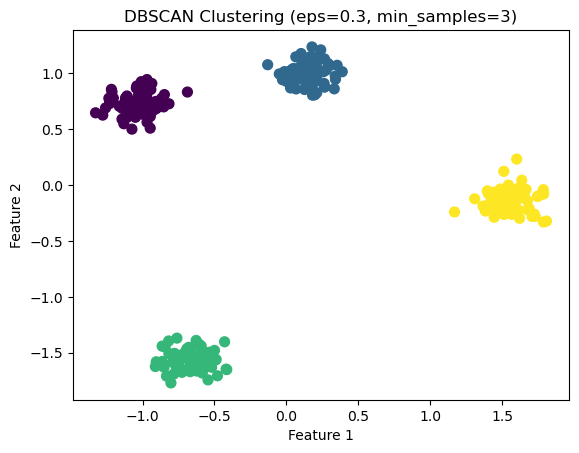

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

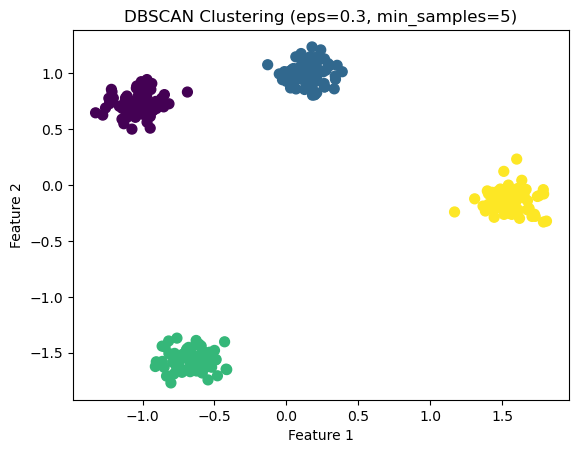

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

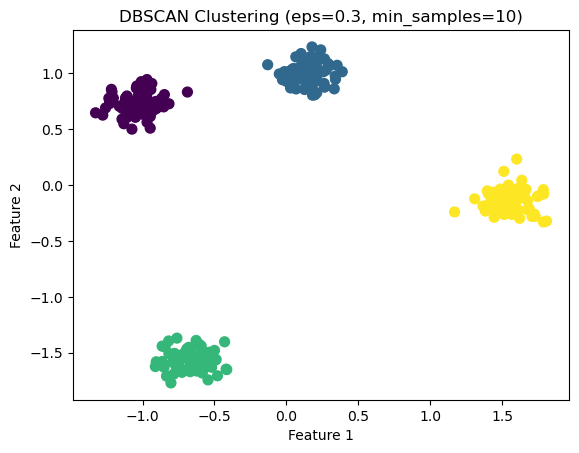

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

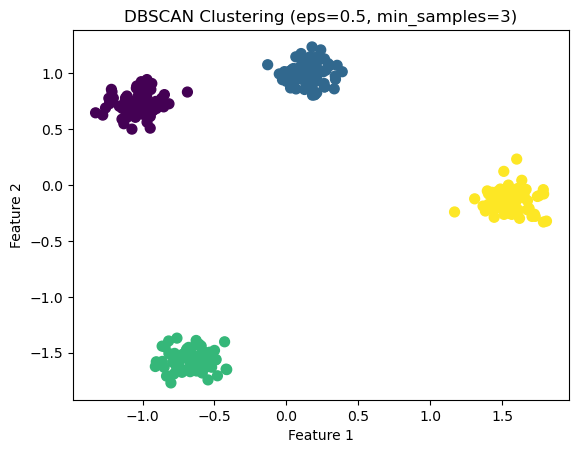

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

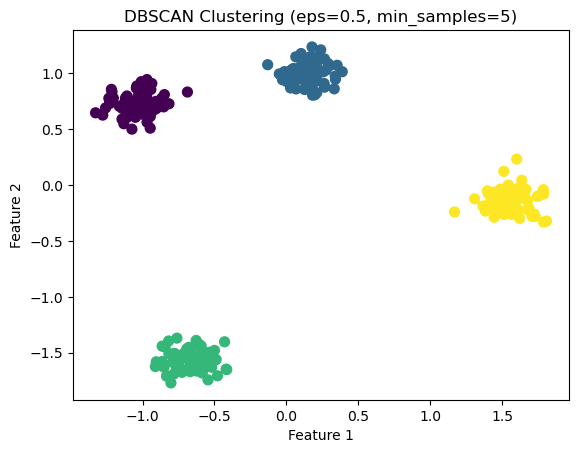

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

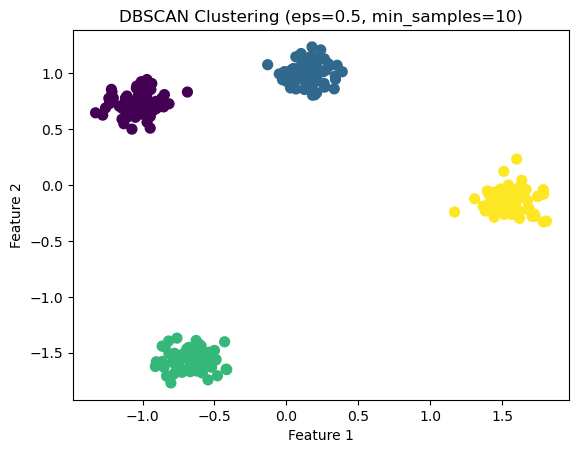

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

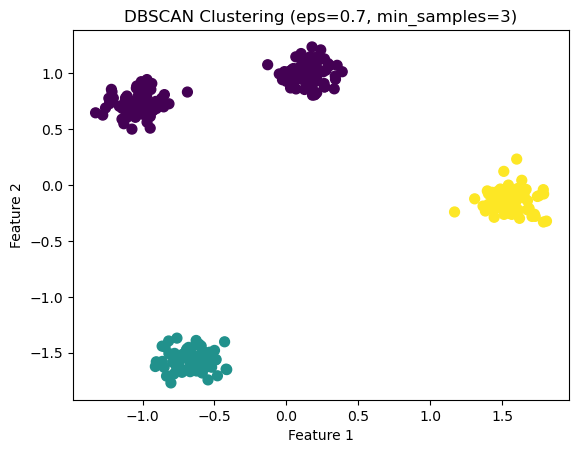

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

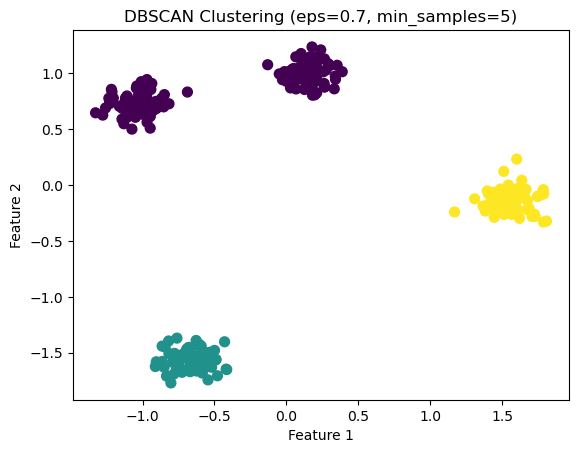

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

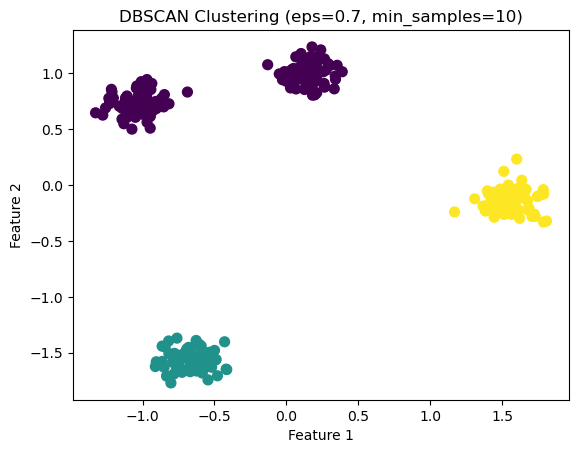

In [46]:
# Explore the effect of different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Visualize clusters for each parameter combination
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()


`Exploring Cluster Characteristics`    


Cluster Distribution:
 Cluster
0    150
1     75
2     75
Name: count, dtype: int64


Text(0.5, 1.0, 'Noise Points in DBSCAN')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

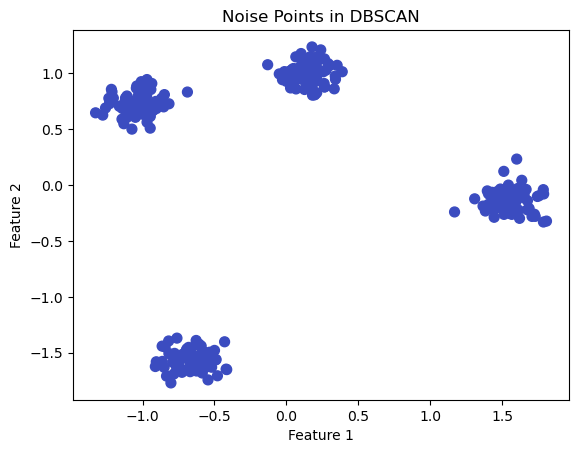

In [47]:
# Assign clusters to the data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels

# Count the number of points in each cluster (-1 represents noise)
print("Cluster Distribution:\n", df['Cluster'].value_counts())

# Visualize data points classified as noise
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=(labels == -1), cmap='coolwarm', s=50)
plt.title("Noise Points in DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


`Custom Implementation`    


Text(0.5, 1.0, 'Custom DBSCAN Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

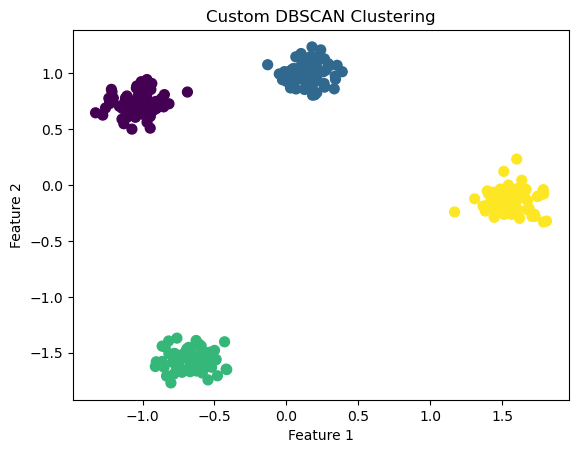

In [48]:
from scipy.spatial import distance

def region_query(X, point_idx, eps):
    """Find points within `eps` radius of a given point."""
    return [i for i in range(len(X)) if distance.euclidean(X[point_idx], X[i]) <= eps]

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_samples):
    """Expand a cluster by recursively adding density-reachable points."""
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor in neighbors:
            if labels[neighbor] == -1:  # Previously marked as noise
                labels[neighbor] = cluster_id
            elif labels[neighbor] == 0:  # Not visited
                labels[neighbor] = cluster_id
                expand_cluster(X, labels, neighbor, cluster_id, eps, min_samples)
        return True

def dbscan_custom(X, eps=0.5, min_samples=5):
    """Custom DBSCAN implementation."""
    labels = [0] * len(X)  # Initialize all points as unvisited
    cluster_id = 0
    
    for point_idx in range(len(X)):
        if labels[point_idx] == 0:  # Not yet visited
            if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_samples):
                cluster_id += 1
    
    return np.array(labels)

# Test custom DBSCAN
labels_custom = dbscan_custom(X_scaled, eps=0.5, min_samples=5)

# Visualize custom implementation
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_custom, cmap='viridis', s=50)
plt.title("Custom DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


[Back to the top](#Contents)
___

# Gaussian Mixture Model

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Mean Shift

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Spectral Clustering

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# OPTICS


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# BIRCH

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# HDBSCAN

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Other Methods

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# All Methods

In [7]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import (
    KMeans, 
    AgglomerativeClustering, 
    DBSCAN, 
    SpectralClustering, 
    Birch, 
    MeanShift, 
    AffinityPropagation
)
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import OPTICS
import hdbscan
import time

In [8]:

# Generate datasets
def generate_datasets():
    datasets = []
    n_samples = 1500
    random_state = 170
    noisy_circles = make_blobs(n_samples=n_samples, centers=[[0, 0], [1, 1]], random_state=random_state)
    noisy_moons = make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)
    blobs = make_blobs(n_samples=n_samples, random_state=random_state)
    aniso = make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    aniso = (np.dot(aniso[0], transformation), aniso[1])
    datasets.append(noisy_circles)
    datasets.append(noisy_moons)
    datasets.append(blobs)
    datasets.append(aniso)
    return datasets

In [9]:
# Define clustering algorithms
def define_algorithms():
    algorithms = {
        "MiniBatch KMeans": KMeans(n_clusters=3, random_state=42),
        "Affinity Propagation": AffinityPropagation(random_state=42),
        "MeanShift": MeanShift(),
        "Spectral Clustering": SpectralClustering(n_clusters=3, affinity='nearest_neighbors'),
        "Ward": AgglomerativeClustering(n_clusters=3, linkage='ward'),
        "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
        "DBSCAN": DBSCAN(eps=0.2),
        "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=30),
        "OPTICS": OPTICS(min_samples=10),
        "BIRCH": Birch(n_clusters=3),
        "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42)
    }
    return algorithms


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_e

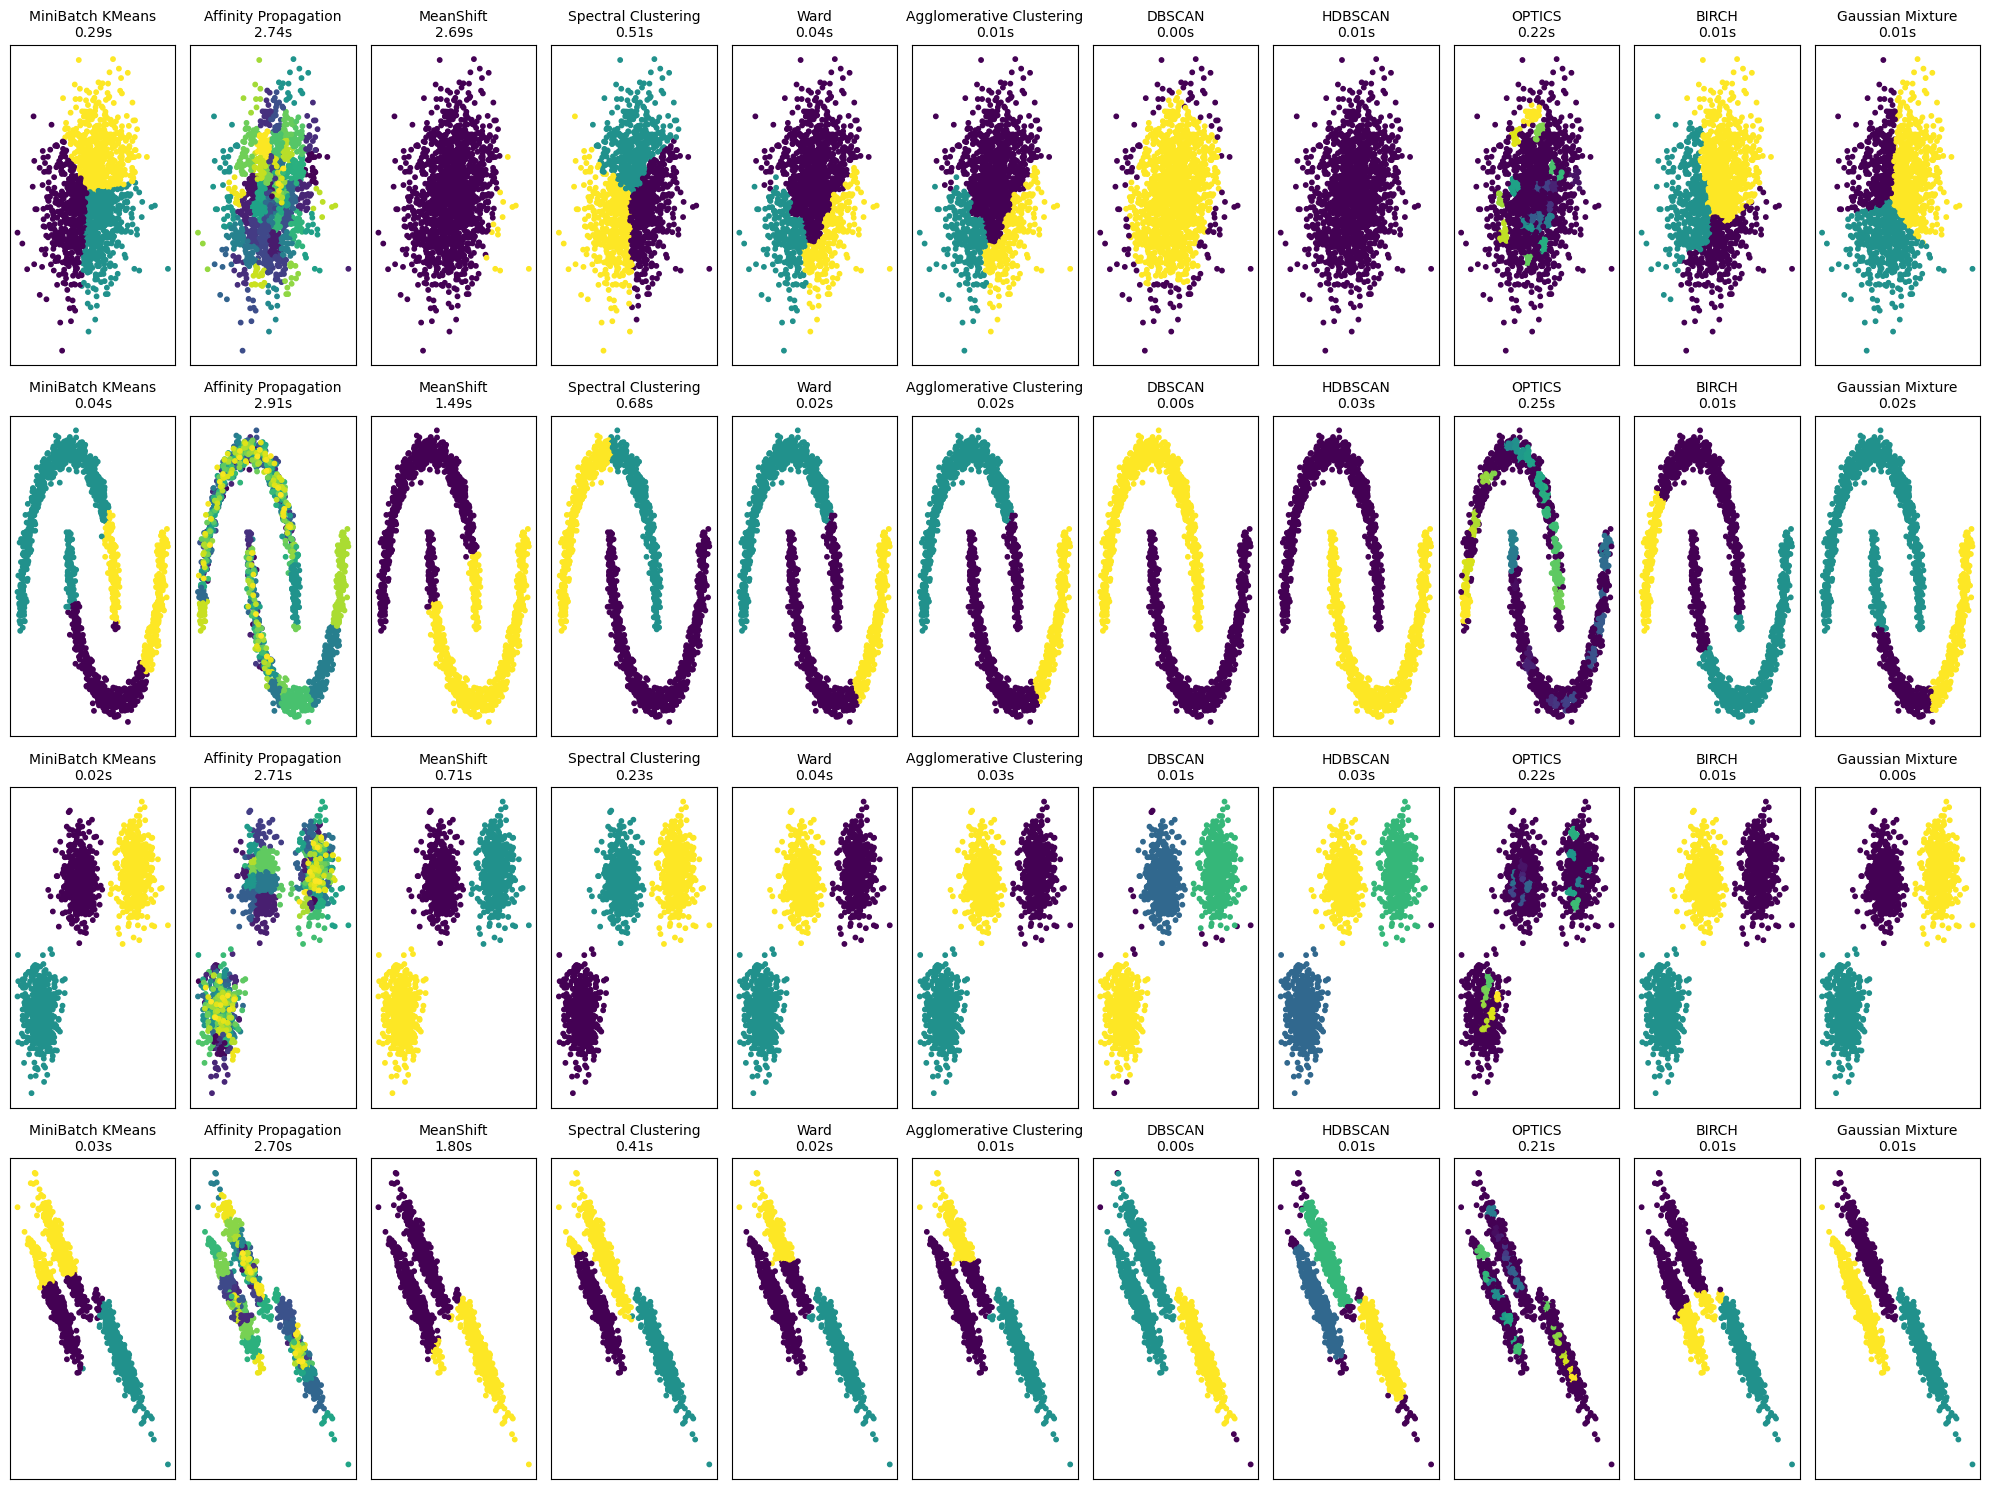

In [10]:
# Plot results
def plot_results(datasets, algorithms):
    fig, axes = plt.subplots(len(datasets), len(algorithms), figsize=(20, 15))
    axes = axes.flatten()
    
    for i_dataset, dataset in enumerate(datasets):
        X, y = dataset
        X = StandardScaler().fit_transform(X)
        
        for i_alg, (name, algorithm) in enumerate(algorithms.items()):
            t0 = time.time()
            try:
                if hasattr(algorithm, "fit_predict"):
                    y_pred = algorithm.fit_predict(X)
                else:
                    y_pred = algorithm.fit(X).predict(X)
            except Exception:
                y_pred = np.zeros(X.shape[0])
            t1 = time.time()
            
            # Plot
            ax = axes[i_dataset * len(algorithms) + i_alg]
            ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis')
            ax.set_title(f"{name}\n{(t1 - t0):.2f}s", fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Main execution
datasets = generate_datasets()
algorithms = define_algorithms()
plot_results(datasets, algorithms)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Internal Metrics
Internal Metrics:
Silhouette Score: 0.88
Davies-Bouldin Index: 0.17

DBSCAN Internal Metrics
Internal Metrics:
Silhouette Score: 0.82
Davies-Bouldin Index: 1.16

KMeans External Metrics
External Metrics:
Adjusted Rand Index (ARI): 1.00
Normalized Mutual Information (NMI): 1.00

DBSCAN External Metrics
External Metrics:
Adjusted Rand Index (ARI): 0.96
Normalized Mutual Information (NMI): 0.94

KMeans Dunn Index: 0.98
DBSCAN Dunn Index: 1.31

Visualization


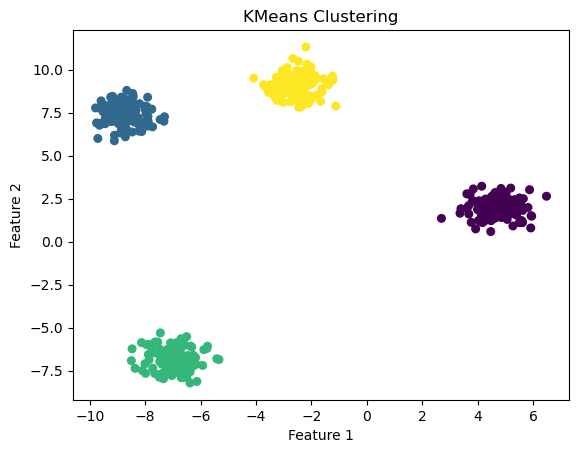

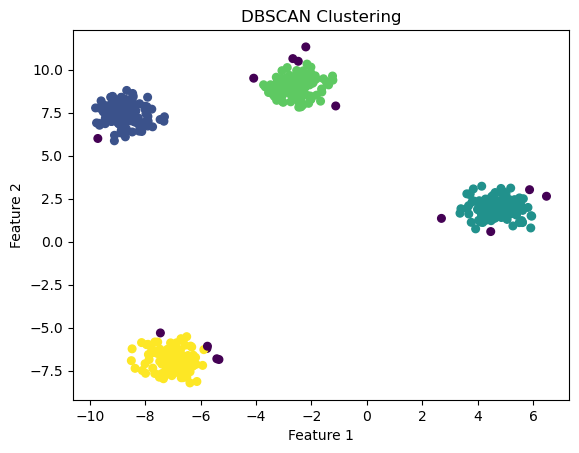

In [12]:
# Import Libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Generate Synthetic Dataset
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Clustering Algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit Predict
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

# Internal Metrics
def evaluate_internal(X, labels):
    print("Internal Metrics:")
    print(f"Silhouette Score: {silhouette_score(X, labels):.2f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.2f}")

print("KMeans Internal Metrics")
evaluate_internal(X, y_kmeans)
print("\nDBSCAN Internal Metrics")
evaluate_internal(X, y_dbscan)

# External Metrics
def evaluate_external(y_true, y_pred):
    print("External Metrics:")
    print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, y_pred):.2f}")
    print(f"Normalized Mutual Information (NMI): {normalized_mutual_info_score(y_true, y_pred):.2f}")

print("\nKMeans External Metrics")
evaluate_external(y_true, y_kmeans)
print("\nDBSCAN External Metrics")
evaluate_external(y_true, y_dbscan)

# Dunn Index
def calculate_dunn_index(X, labels):
    # Calculate intra-cluster distances
    clusters = np.unique(labels)
    intra_distances = []
    for cluster in clusters:
        if cluster == -1:  # Skip noise in DBSCAN
            continue
        points = X[labels == cluster]
        distances = cdist(points, points, metric="euclidean")
        intra_distances.append(np.max(distances))
    
    # Calculate inter-cluster distances
    inter_distances = []
    for i, cluster1 in enumerate(clusters):
        if cluster1 == -1:  # Skip noise
            continue
        points1 = X[labels == cluster1]
        for j, cluster2 in enumerate(clusters):
            if j <= i or cluster2 == -1:  # Skip noise and duplicates
                continue
            points2 = X[labels == cluster2]
            distances = cdist(points1, points2, metric="euclidean")
            inter_distances.append(np.min(distances))
    
    if intra_distances and inter_distances:
        dunn_index = np.min(inter_distances) / np.max(intra_distances)
        return dunn_index
    return np.nan

print(f"\nKMeans Dunn Index: {calculate_dunn_index(X, y_kmeans):.2f}")
print(f"DBSCAN Dunn Index: {calculate_dunn_index(X, y_dbscan):.2f}")

# Visualization
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f"{algorithm_name} Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

print("\nVisualization")
plot_clusters(X, y_kmeans, "KMeans")
plot_clusters(X, y_dbscan, "DBSCAN")


[Back to the top](#Contents)
___